<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Загрузка данных
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Аккуратный датасет без пропусков. Возраст и зарплату можно перевести в целочисленный формат для экономии ресурсов памяти.

In [ ]:
# Преобразование в целочисленный формат
data['Зарплата'] = data['Зарплата'].astype('int')
data['Возраст'] = data['Возраст'].astype('int')

In [ ]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [ ]:
# Проверка на дубликаты
data.duplicated().sum()

153

Удалим дублирующиеся строки из исходного датасета.

In [ ]:
data.drop_duplicates(inplace = True)

<b>Выводы</b>

В исходных данных удалены дубликаты. Данные по зарплате и возрасту приведены к целочисленному типу, чтобы ускорить обращение к данным.

<AxesSubplot:xlabel='Страховые выплаты', ylabel='Density'>

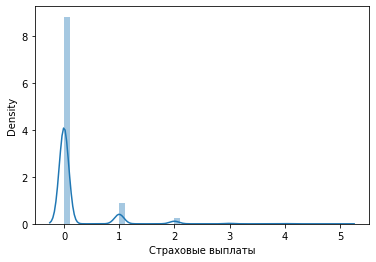

In [ ]:
# Оценка плотности ядра данных по страховым выплатам
sns.distplot(data['Страховые выплаты'])

## Умножение матриц

В этом задании мы можем записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружим её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можем их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии при умножении признаков на обратимую матрицу не изменится.

**Обоснование:**

        
Раз для неквадратных $X$ и $X^T$ обратных матриц не существует, преобразуем формулу весов $w$ с фокусом на манипуляции с квадратной обратимой матрицей $P$:
        

$$w_P = ((XP)^T(XP))^{-1} (XP)^Ty = P^{-1}((XP)^{T}X)^{-1} (XP)^Ty = P^{-1}((XP)^{T}X)^{-1} P^TX^Ty = $$
        
$$ = P^{-1}(P^TX^TX)^{-1} P^TX^Ty = P^{-1}(X^TX)^{-1}(P^T)^{-1} P^TX^Ty $$
        
        

Опустим в преобразовании следующий блок $(P^T)^{-1} P^T = E$ как сводящийся к единичной матрице и получим:

$$w_P = P^{-1}(X^TX)^{-1} X^Ty$$

То есть подставив формулу для $w = (X^TX)^{-1}X^Ty$, получим:

$$w_P = P^{-1}w$$

А предсказание $a_P$ для признаков, преобразованных умножением на обратимую квадратную матрицу, $XP$ примет следующий вид:
$$a_P = XPw_P = XPP^{-1}w = Xw = a$$

В конечном счете векторы предсказаний до умножения признаков на обратимую квадратную матрицу и после такого преобразования совпали.

<b>Вывод:</b> значение предсказания **a** не меняется при умножении матрицы признаков на обратимую матрицу, то есть матрица преобразования P должна быть квадратной с определителем НЕ равным 0.

## Алгоритм преобразования

**Алгоритм**

Для проверки корректности предлагаемого алгоритма защиты информации будем изучать метрики качества регрессии до и после преобразования. В качестве преобразования будем умножать матрицу признаков на обратимую матрицу P, сгенерированную случайным образом.

1. Обучим модель для матрицы признаков Х до преобразования и узнаем исходные метрики качества 
2. Сгенерируем рандомную квадратную матрицу P и проверим ее на обратимость
3. Сформируем матрицу преобразованных признаков B = XP путем умножения матрицы признаков X на обратимую матрицу P
4. Получим предсказания по модели на преобразованных признаках P и измерим метрики качества

**Обоснование**

При перемножении матриц X и P важно соблюдать необходимую размерность. Обратная матрица P существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

<div class="alert alert-warning">
    <h2> Комментарий студента <a class="tocSkip"> </h2>

**Уточнения к алгоритму**

3. Случайная матрица P должна быть квадратной с размерностью (m x m), где m - это ширина матрицы признаков X (m x n). 

**Обоснование**

Умножение матрицы на матрицу возможно, если ширина первой матрицы (m x n) равна высоте второй матрицы (n x r). Тогда размер произведения этих матриц будет m x r (размерность n "схлопывается"). Результат умножения матриц зависит от порядка множителей. Если ширина первой матрицы не равна длине второй, то умножение невозможно. 

Поэтому для нашей задачи необходимо строгое умножение матрицы признаков X (m x n) на случайную обратимую матрицу P (m x m).

## Проверка алгоритма

In [ ]:
# Определим исходные и целевой признаки
features = data.drop('Страховые выплаты', axis=1).values
target = data['Страховые выплаты'].values

In [ ]:
# Разделим данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [ ]:
# Запустим на исходном датасете модель линейной регрессии
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [ ]:
# Проверим R2-метрику для работы модели линейной регрессии до преобразования
r2_before = r2_score(target_test, model.predict(features_test))
print("R2-метрика качества линейной регрессии на исходных признаках:", r2_before)

R2-метрика качества линейной регрессии на исходных признаках: 0.42307727615837565


Сгенерируем случайным образом квадратную матрицу 4х4

In [ ]:
matrix = np.random.normal(size = (4,4)) 
matrix

array([[-0.54915156, -0.6096332 , -0.85367095, -1.20624174],
       [ 0.26453389, -0.48325437, -0.92328575,  0.27020407],
       [-0.20951706, -0.08439969, -0.04280263, -0.7169035 ],
       [-1.24249541,  0.95885608, -0.41925829, -0.37649239]])

Проверим обратимость матрицы, то есть попробуем найти матрицу, обратную ей.

In [ ]:
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[-2.56561943,  2.16942268,  5.17761622, -0.08209221],
       [-2.54484384,  1.80585844,  4.5750751 ,  0.7377568 ],
       [ 0.88849479, -1.62607377, -1.88688676, -0.42071379],
       [ 0.99636165, -0.74953564, -3.33401934, -0.03774437]])

In [ ]:
# Умножим исходные признаки на рандомную матрицу
features_x = features @ matrix

In [ ]:
# Разделим преобразованные данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features_x, target, test_size=0.25, random_state=12345)

In [ ]:
# Обучим модель линейной регрессии
model.fit(features_x, target)

LinearRegression()

In [ ]:
# Проверим R2-метрику для работы модели линейной регрессии после преобразования
r2_after = r2_score(target_test, model.predict(features_test))
print("R2-метрика качества линейной регрессии на преобразованных признаках:", r2_after)

R2-метрика качества линейной регрессии на преобразованных признаках: 0.4241846348619305


<b> Вывод</b>

После преобразования качество линейной регрессии практически не изменилось: R2-метрика не меняет своего значения. 
Алгоритм преобразования (защиты) данных должен работать корректно.

In [ ]:
# Попытка восстановить исходные признаки
original = features_x @ matrix_inv
restore = pd.DataFrame(original.astype('int'))
restore.head()

,0,1,2,3
0,1,40,49599,0
1,0,45,37999,0
2,0,29,21000,0
3,0,20,41699,1
4,1,27,26099,0


Личные данные достаточно хорошо защищены от дешифровки.

## Итоговый вывод

В ходе проекта мы:

- Загрузили и изучили исходные данные
- При преобразовании формул пришли к выводу, что качество линейной регресии не меняется при умножении исходной матрицы данных на случайно сгенерированную обратимую матрицу
- Предложили алгоритм преобразования данных и исследовали его на изменение R2-метрики качества работы модели линейной регрессии до и после преобразования.

По итогам проекта приходим к выводу, что использование матричных операций хорошо показывает себя для задач безопасной защиты данных. 